<a href="https://colab.research.google.com/github/leoferro/Clusteriza-o_cidades/blob/main/Clusteriza%C3%A7%C3%A3o_de_cidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização de cidades

Testes práticos utilizando os conceitos de clusterização

In [ ]:
import requests

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Criação da função que pega a variavel da pesquisa e retorna um dataframe apenas com as colunas relevantes para seu resultado

In [ ]:
def get_variable(numero_variavel: str) -> pd.DataFrame:
  '''
      A partir do numero da variavel realiza um request na API do IBGE
      Resgata o nome da variavel e seus resultados por cidade
      Converte em um dataframe e cria suas colunas
      Retorna esse dataframe apenas com as colunas
      ["cidade", "id_cidade", "{variavel_nome}"]
  '''

  req = requests.get(f'https://servicodados.ibge.gov.br/api/v3/agregados/8418/periodos/2019/variaveis/{numero_variavel}?localidades=N6[all]')

  res = req.json()[0]

  variavel_nome    = res['variavel']
  serie_resultados = res['resultados'][0]['series']

  df = pd.DataFrame(serie_resultados)


  df['cidade']        = df['localidade'].apply(lambda x : x['nome'])
  df['id_cidade']     = df['localidade'].apply(lambda x : x['id'])

  df[variavel_nome] = df['serie'].apply(lambda x: float(x['2019']))

  df.drop(['serie', 'localidade'], axis=1, inplace=True)

  return df

Utilizando a função acima para iterar na lista dos ids das variáveis da api

In [ ]:
vars_ids = [str(x) for x in range (12747, 12755)]

dfs = []

for var_id in vars_ids:
  dfs.append(get_variable(var_id))

Join dos dataframes a partir da cidade

In [ ]:
df = dfs.pop()

for df4join in dfs:
  df = df.merge(df4join, how = 'outer', on=['cidade','id_cidade'])

display(df.shape)
display(df.head())

55700

,cidade,id_cidade,Vazios remanescentes,Áreas urbanizadas densas,Áreas urbanizadas pouco densas,Total de áreas urbanizadas,Loteamento vazio,Área total mapeada,Outros equipamentos urbanos,Vazios intraurbanos
0,Alta Floresta D'Oeste - RO,1100015,0.0,5.12,1.33,6.46,0.13,6.58,0.11,0.00
1,Ariquemes - RO,1100023,0.0,30.28,2.98,33.26,0.91,34.17,2.98,0.58
2,Cabixi - RO,1100031,0.0,1.36,0.88,2.24,0.00,2.24,0.06,0.00
3,Cacoal - RO,1100049,0.0,24.60,3.45,28.04,0.97,29.01,3.17,0.00
4,Cerejeiras - RO,1100056,0.0,5.43,0.88,6.31,0.38,6.70,0.22,0.00


### Criando mais features

In [97]:
df['estado'] = df['cidade'].str[-2:]
df['cidade'] = df['cidade'].str[:-5]

## Primeiras Analises

Não Há valores Nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cidade                          5570 non-null   object 
 1   id_cidade                       5570 non-null   object 
 2   Vazios remanescentes            5570 non-null   float64
 3   Áreas urbanizadas densas        5570 non-null   float64
 4   Áreas urbanizadas pouco densas  5570 non-null   float64
 5   Total de áreas urbanizadas      5570 non-null   float64
 6   Loteamento vazio                5570 non-null   float64
 7   Área total mapeada              5570 non-null   float64
 8   Outros equipamentos urbanos     5570 non-null   float64
 9   Vazios intraurbanos             5570 non-null   float64
dtypes: float64(8), object(2)
memory usage: 478.7+ KB


Tanto os "Vazios remanescentes" quanto os "Vazios interurbanos" mais de 75% dos dados são 0.

"Loteamento Vazio" e "Outros equipamentos urbanod" temos pelo menos 25% como 0

As outras 3 variáveis apresentam desvio padrão proximo e maximo proximo, endo necessário mais estudo para ver se existe alguma correlação entre elas.

In [ ]:
df.describe()

,Vazios remanescentes,Áreas urbanizadas densas,Áreas urbanizadas pouco densas,Total de áreas urbanizadas,Loteamento vazio,Área total mapeada,Outros equipamentos urbanos,Vazios intraurbanos
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,0.003336,6.600768,1.647785,8.248522,0.378452,8.626977,0.410776,0.066513
std,0.058862,22.835446,3.250011,24.555514,1.050450,24.915963,1.276400,0.504354
min,0.000000,0.000000,0.000000,0.120000,0.000000,0.120000,0.000000,0.000000
25%,0.000000,1.022500,0.170000,1.420000,0.000000,1.470000,0.000000,0.000000
50%,0.000000,2.090000,0.610000,2.940000,0.050000,3.100000,0.040000,0.000000
75%,0.000000,4.880000,1.690000,6.820000,0.300000,7.330000,0.290000,0.000000
max,3.470000,895.360000,52.050000,914.560000,17.510000,914.730000,32.940000,19.410000


### Analise visual

"Total de área urbanizadas", "Área total Mapeada", "Áreas urbanizadas densas" possuem uma correlação linear forte aparentemente.

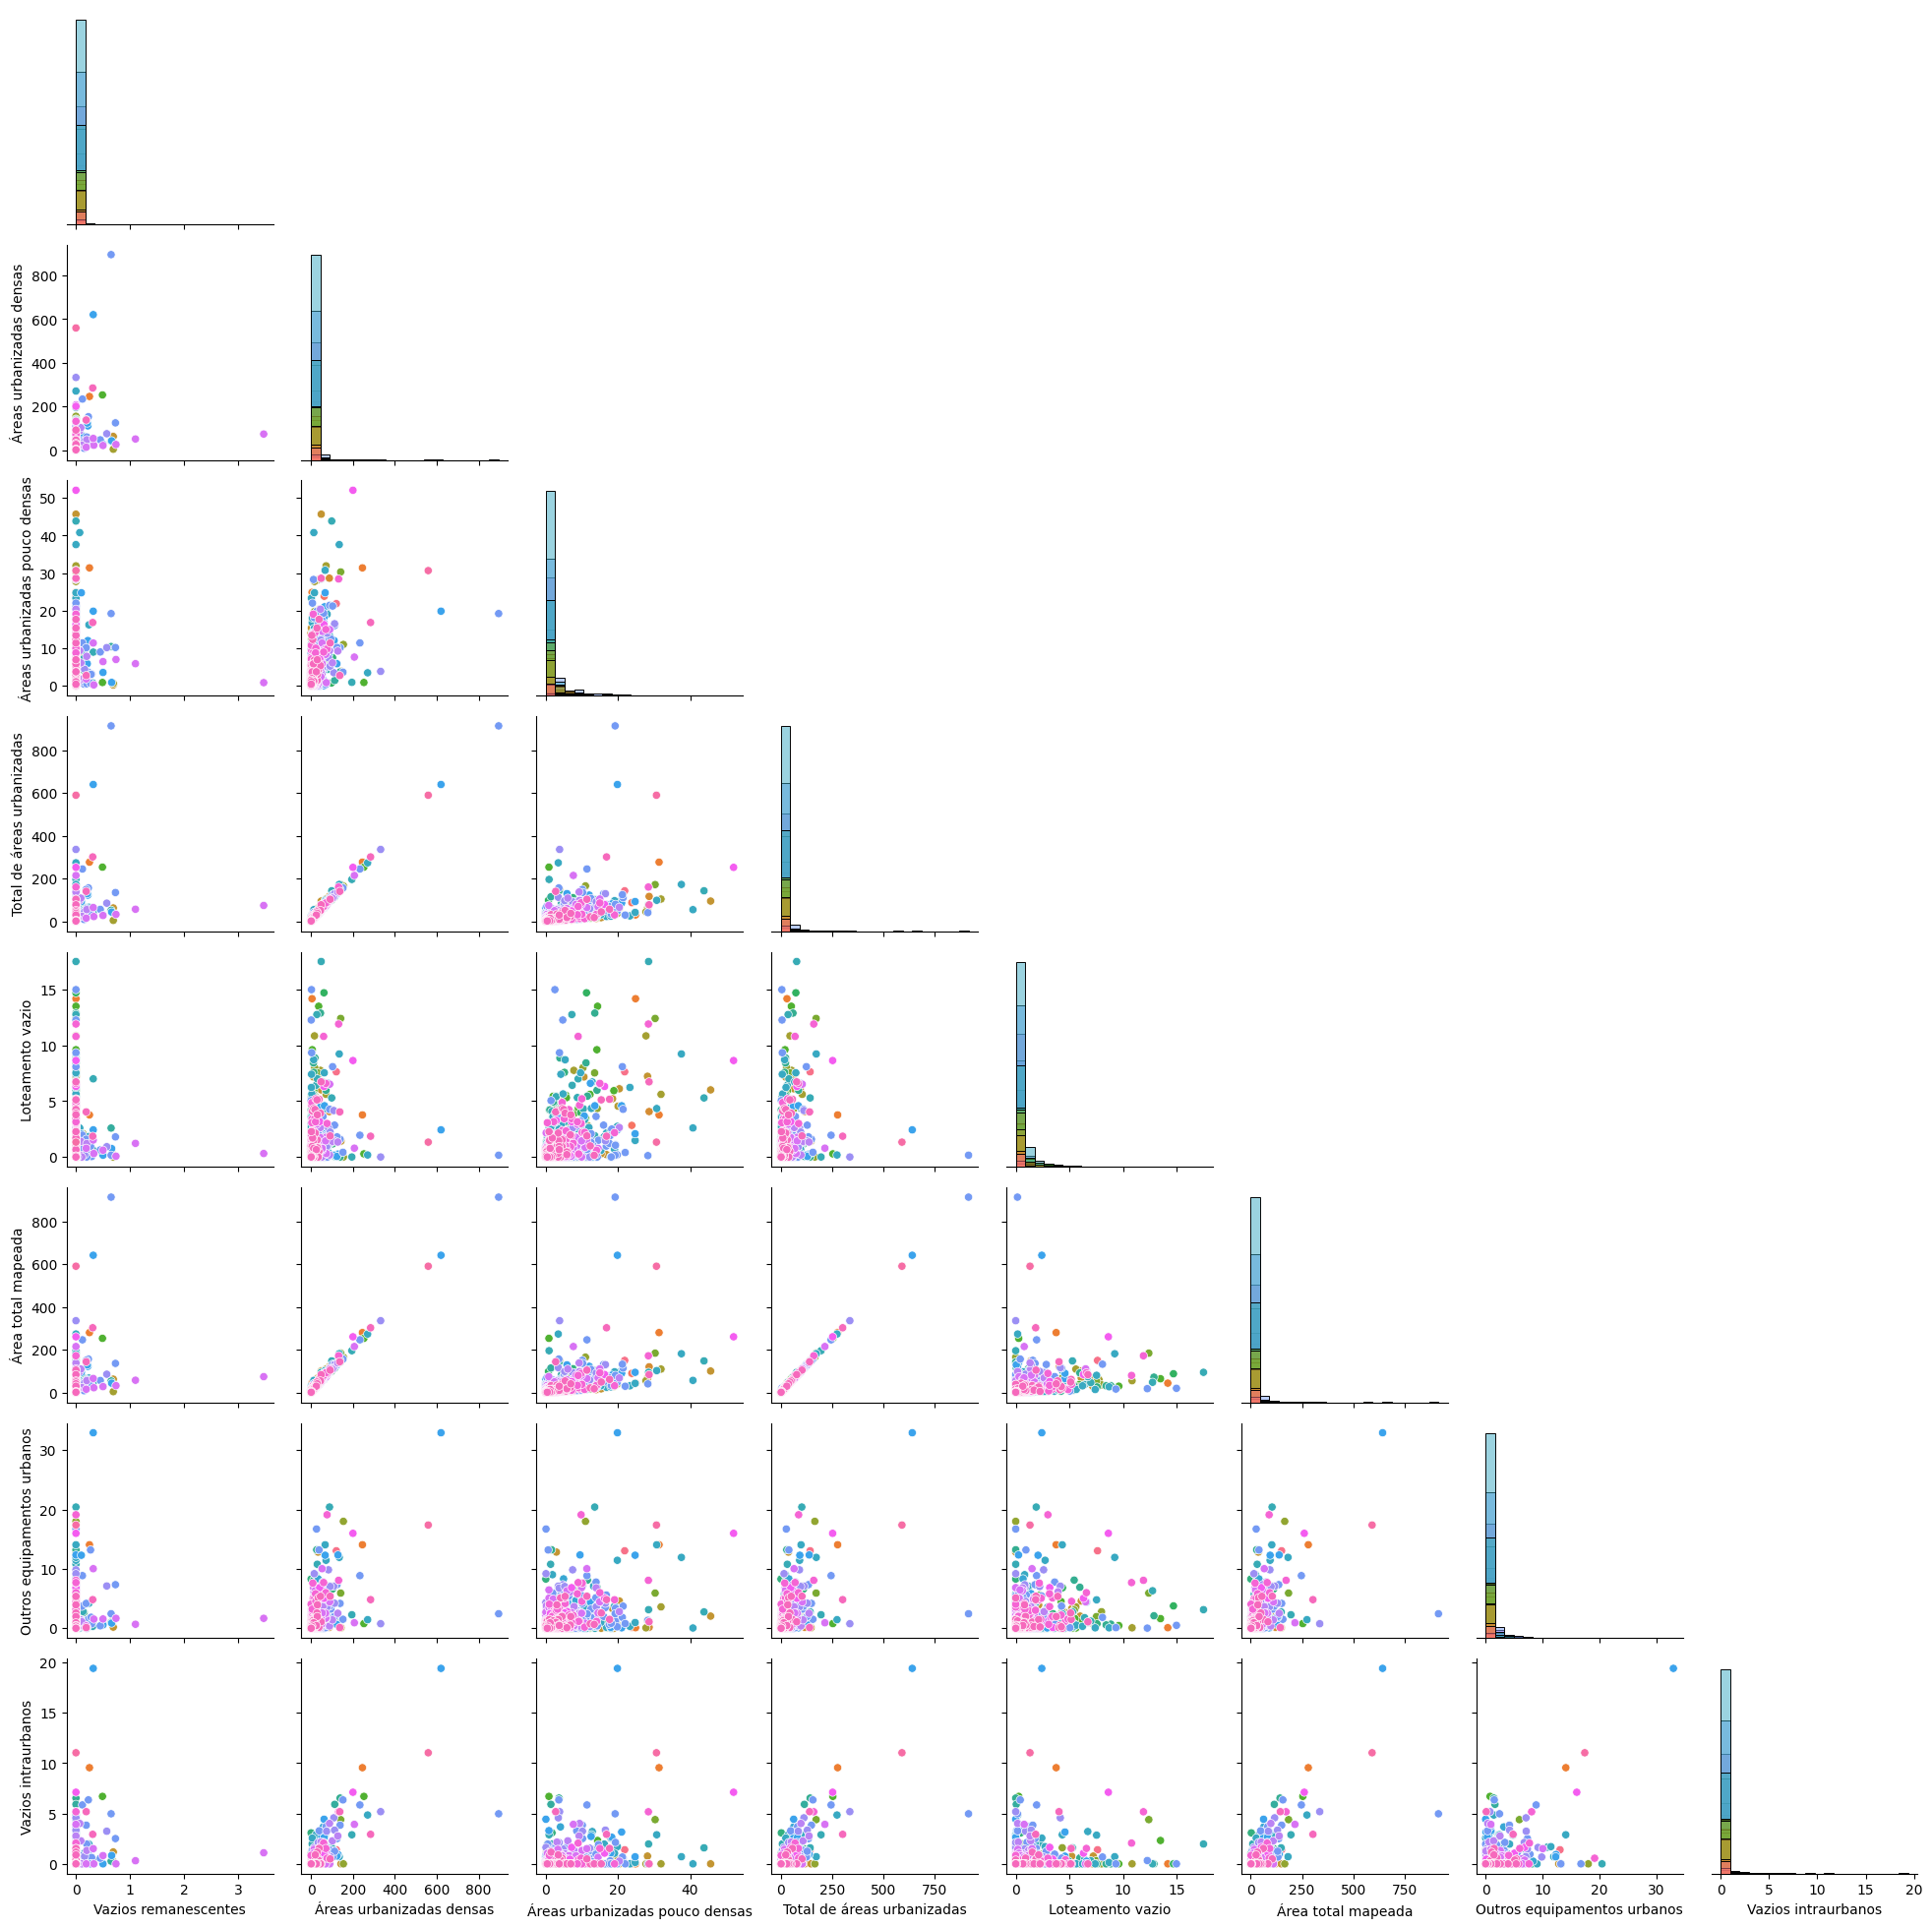

In [104]:
g = sns.PairGrid(df, diag_sharey=False, corner=True, hue= 'estado')
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, bins = 20)